## Figure 01 - Looking at SARS-CoV-2 Allele Frequency Distribution Across Genes by Mutation Type

Notes ...

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter

In [18]:
data = pd.read_csv("data/combined_variants_long_table.csv")

filtered_data = data[
    (data['FILTER'] == 'PASS') & 
    (data['REF'].isin(['A', 'T', 'C', 'G'])) &
    (data['ALT'].isin(['A', 'T', 'C', 'G']))
]

get_unique_genes = filtered_data['GENE'].unique()

In [28]:
## Main ----> 
def get_unique_genes(filtered_data):
    """Get unique genes from the filtered data."""
    return filtered_data['GENE'].unique()

def separate_genes(unique_genes, specified_genes):
    """Separate genes into specified and accessory categories."""
    
    specified_gene_data = {gene: filtered_data[filtered_data['GENE'] == gene] for gene in specified_genes}
    
    accessory_genes = [gene for gene in unique_genes if gene not in specified_genes]
    accessory_gene_data = filtered_data[filtered_data['GENE'].isin(accessory_genes)]
    
    return specified_gene_data, accessory_gene_data

def plot_gene_data(ax, gene_data, gene_label, unique_effects, bins, bin_centers):
    """Plot allele frequency distribution for a single gene."""
    
    bottom = np.zeros(len(bins) - 1)
    
    for effect in unique_effects:
        effect_counts = np.histogram(gene_data[gene_data['EFFECT'] == effect]['AF'], bins=bins)[0]
        ax.bar(bin_centers, effect_counts, width=0.01, bottom=bottom, label=effect, edgecolor='black')
        bottom += effect_counts

    ax.set_xlim(0, 0.2)
    ax.set_ylim(0, bottom.max())
    ax.xaxis.set_major_formatter('{:.2f}'.format)

    ax.set_title(gene_label, fontsize=14, fontweight='bold')
    
    ax.set_xlabel('Allele Frequency', fontsize=12)
    ax.set_ylabel('Mutation Count', fontsize=12)

def plot_allele_frequency_distribution(filtered_data):
    """
    Plot allele frequency distribution across genes by mutation type.
    Separate main viral gene list (orf1ab, S, E) + combine rest into $(accessory genes).
    """
    specified_genes = ['orf1ab', 'S', 'E']
    unique_genes = get_unique_genes(filtered_data)
    specified_gene_data, accessory_gene_data = separate_genes(unique_genes, specified_genes)
    unique_effects = filtered_data['EFFECT'].unique()


    ncols = 2
    nrows = 2  # set ?

    bins = np.arange(0, 1.01, 0.01)
    bin_centers = 0.5 * (bins[1:] + bins[:-1]) # centering for best data viz practices ?

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 12), dpi=300)
    axes = axes.flatten()

    for i, (gene, gene_data) in enumerate(specified_gene_data.items()):
        plot_gene_data(axes[i], gene_data, gene, unique_effects, bins, bin_centers)
    
    plot_gene_data(axes[len(specified_gene_data)], accessory_gene_data, 'Accessory Genes', unique_effects, bins, bin_centers)
    
    for j in range(len(specified_gene_data) + 1, len(axes)):
        axes[j].axis('off')

    fig.suptitle('SARS-CoV-2 Allele Frequency Distribution Across Genes by Mutation Type', fontsize=20, fontweight='bold')

    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', ncol=len(unique_effects), fontsize=12, frameon=False, bbox_to_anchor=(0.5, -0.05))

    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.show()

    # <--- save plot --->
    fig.savefig('plots/fig-01.png', dpi=300, bbox_inches='tight')



/var/folders/jw/x3fn2st54v7f8_8ll783l57c0000gn/T/ipykernel_27786/1338904507.py:27: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0, bottom.max())


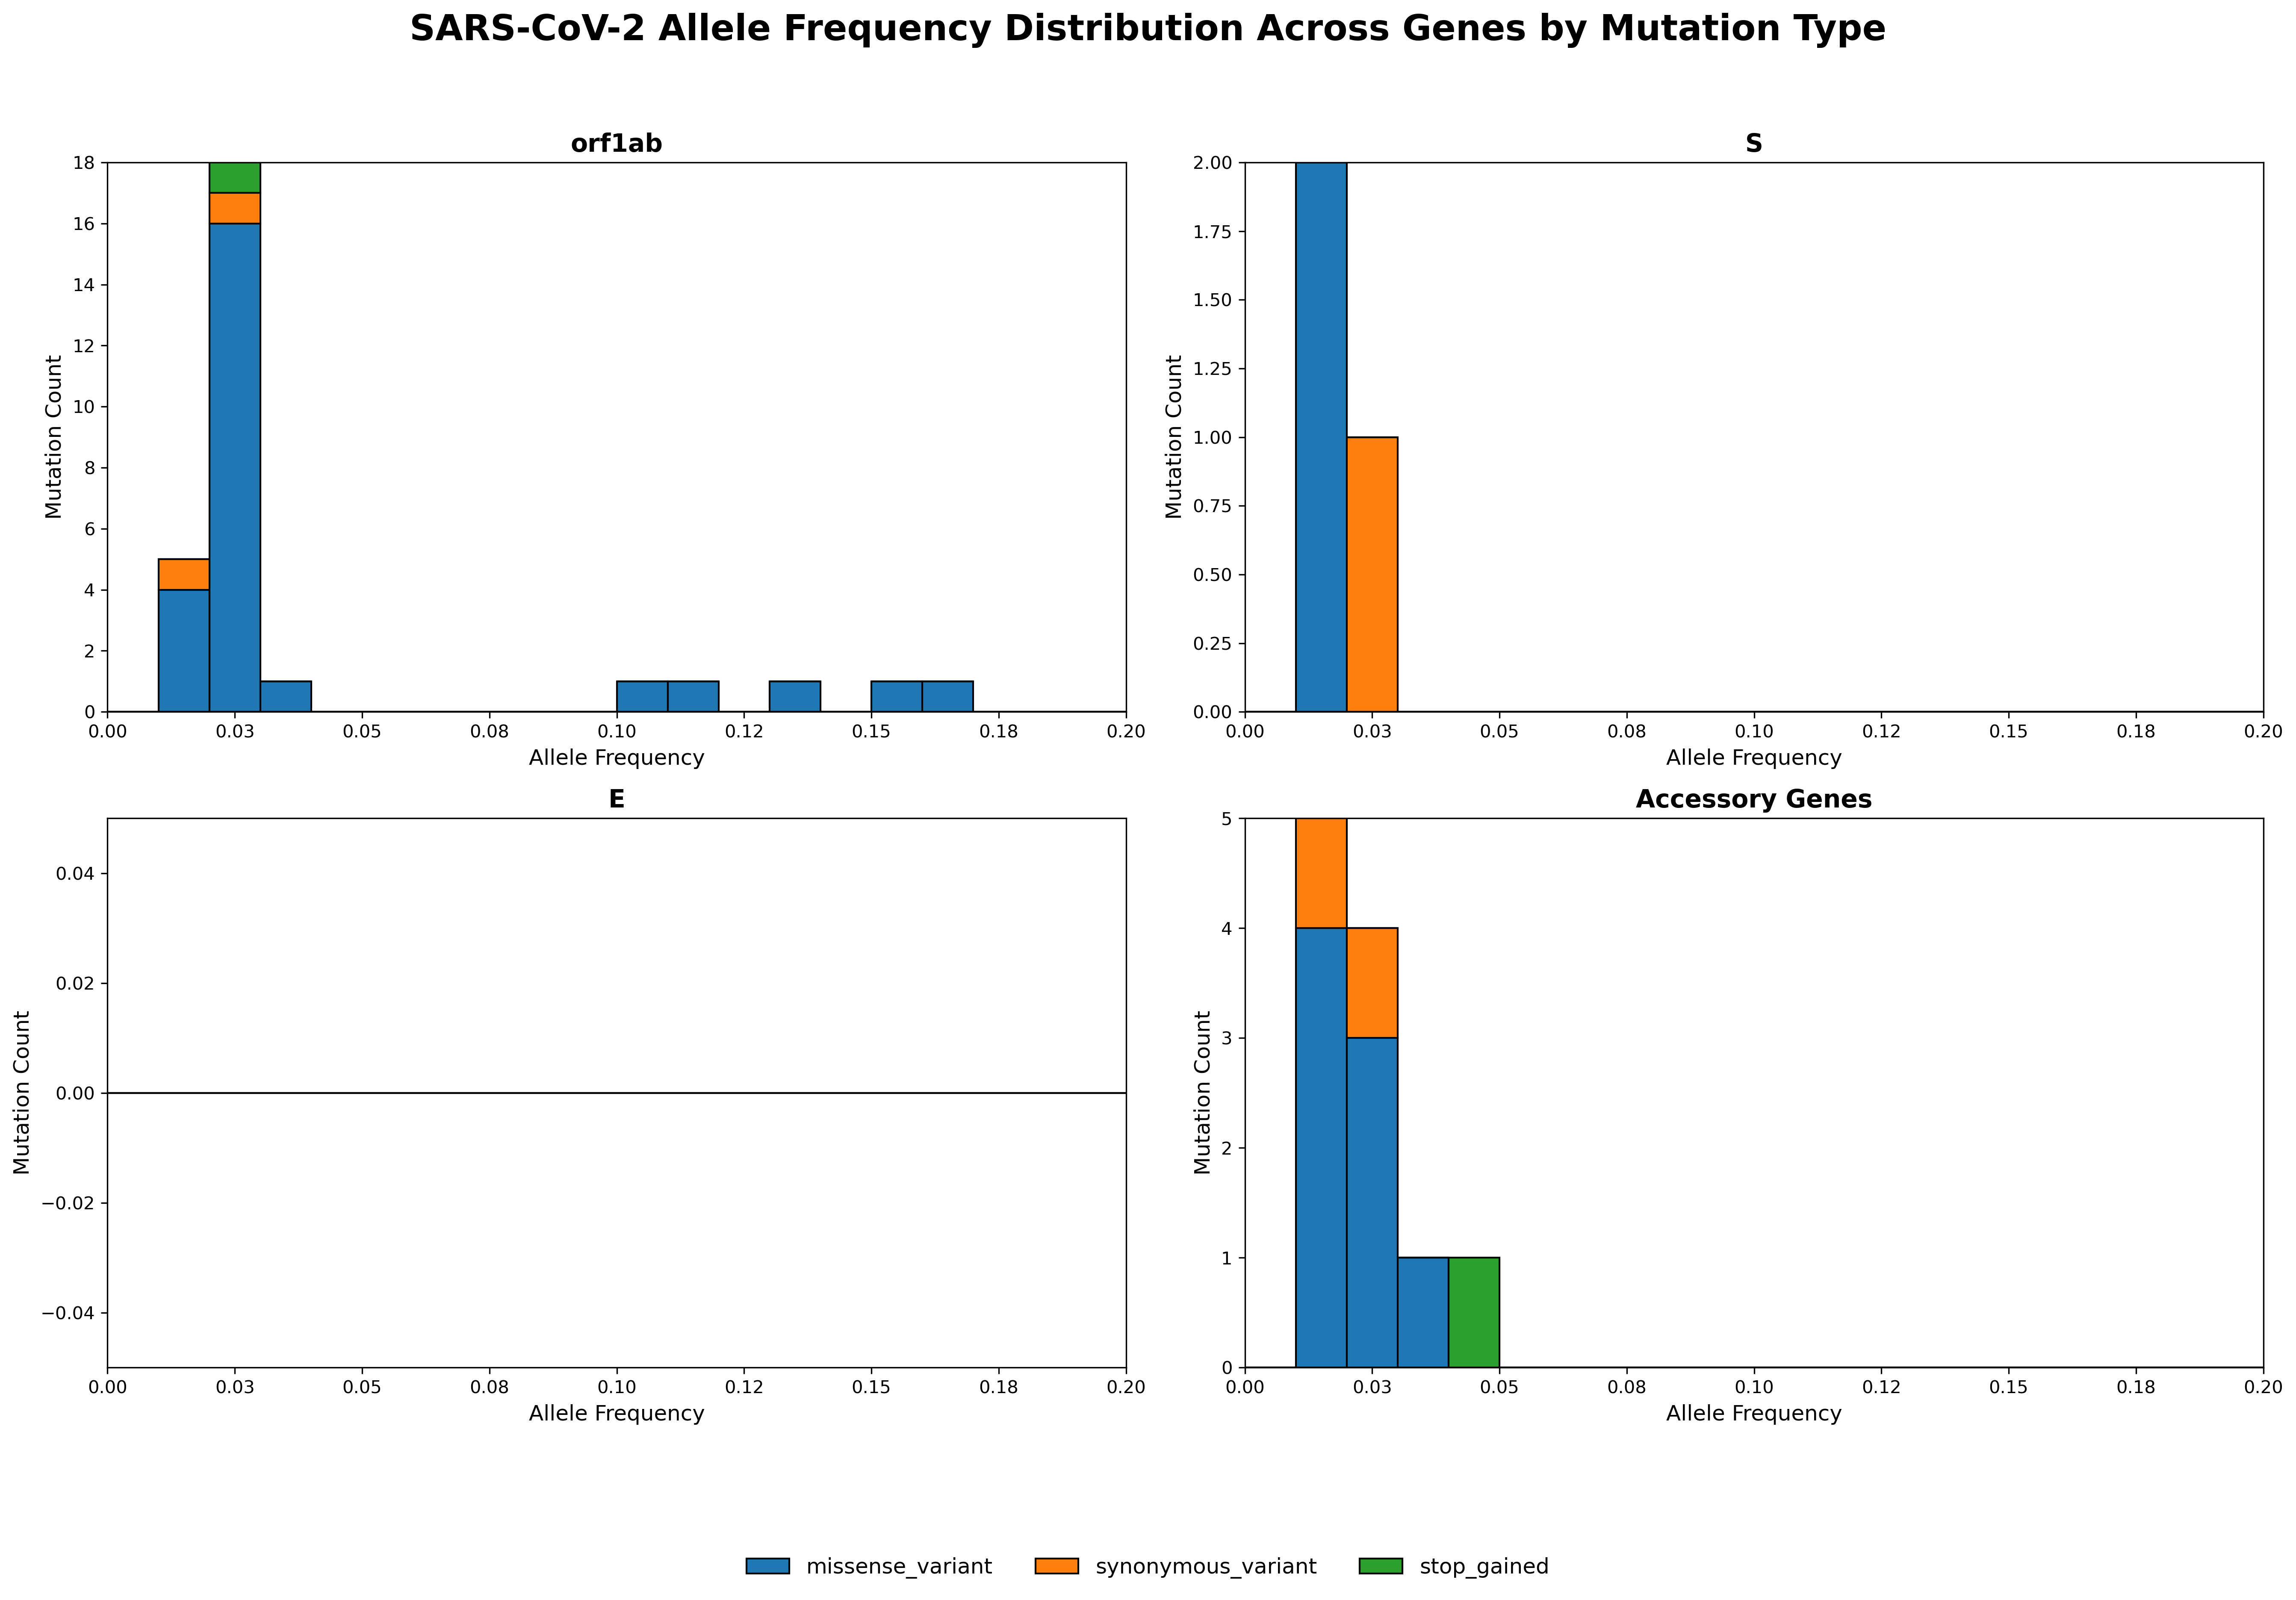

In [29]:
# make plot 
plot_allele_frequency_distribution(filtered_data)